## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  79.527552   773.833135  0.082049  4.856744  0.676538
1  31.080818   541.885880  0.518545  8.540813  1.569058
2  79.281618   651.618568  0.193903  9.215557  1.099199
3  25.129865   926.201955  0.767494  1.696198  1.602011
4   5.804404  1566.172659  0.256098  7.671389  1.490080


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8883672	total: 58ms	remaining: 57.9s
1:	learn: 0.8813818	total: 58.6ms	remaining: 29.2s
2:	learn: 0.8747079	total: 59.1ms	remaining: 19.6s
3:	learn: 0.8671496	total: 59.6ms	remaining: 14.8s
4:	learn: 0.8594296	total: 60.1ms	remaining: 12s
5:	learn: 0.8536390	total: 60.8ms	remaining: 10.1s
6:	learn: 0.8464438	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8391919	total: 61.9ms	remaining: 7.67s
8:	learn: 0.8317365	total: 62.5ms	remaining: 6.88s
9:	learn: 0.8238440	total: 63.1ms	remaining: 6.24s
10:	learn: 0.8171574	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8089609	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8029094	total: 64.5ms	remaining: 4.9s
13:	learn: 0.7955427	total: 65ms	remaining: 4.58s
14:	learn: 0.7883282	total: 65.4ms	remaining: 4.3s
15:	learn: 0.7826934	total: 66ms	remaining: 4.06s
16:	learn: 0.7754652	total: 66.4ms	remaining: 3.84s
17:	learn: 0.7691014	total: 66.8ms	remaining: 3.64s
18:	learn: 0.7641490	total: 67.2ms	remaining: 3.47s
19:

107:	learn: 0.4092174	total: 107ms	remaining: 880ms
108:	learn: 0.4067527	total: 107ms	remaining: 876ms
109:	learn: 0.4042354	total: 108ms	remaining: 871ms
110:	learn: 0.4018254	total: 108ms	remaining: 865ms
111:	learn: 0.3999279	total: 109ms	remaining: 861ms
112:	learn: 0.3976311	total: 109ms	remaining: 855ms
113:	learn: 0.3959881	total: 109ms	remaining: 850ms
114:	learn: 0.3937637	total: 110ms	remaining: 844ms
115:	learn: 0.3920760	total: 110ms	remaining: 840ms
116:	learn: 0.3901666	total: 111ms	remaining: 836ms
117:	learn: 0.3876488	total: 111ms	remaining: 831ms
118:	learn: 0.3858591	total: 112ms	remaining: 827ms
119:	learn: 0.3834077	total: 112ms	remaining: 822ms
120:	learn: 0.3813171	total: 112ms	remaining: 817ms
121:	learn: 0.3792796	total: 113ms	remaining: 813ms
122:	learn: 0.3775937	total: 114ms	remaining: 810ms
123:	learn: 0.3755718	total: 114ms	remaining: 804ms
124:	learn: 0.3737387	total: 114ms	remaining: 801ms
125:	learn: 0.3716586	total: 115ms	remaining: 797ms
126:	learn: 

281:	learn: 0.2068814	total: 185ms	remaining: 472ms
282:	learn: 0.2062352	total: 186ms	remaining: 471ms
283:	learn: 0.2057920	total: 186ms	remaining: 470ms
284:	learn: 0.2050052	total: 187ms	remaining: 469ms
285:	learn: 0.2043024	total: 187ms	remaining: 467ms
286:	learn: 0.2040053	total: 188ms	remaining: 467ms
287:	learn: 0.2034478	total: 188ms	remaining: 466ms
288:	learn: 0.2027065	total: 189ms	remaining: 464ms
289:	learn: 0.2020109	total: 189ms	remaining: 463ms
290:	learn: 0.2018078	total: 190ms	remaining: 462ms
291:	learn: 0.2007852	total: 190ms	remaining: 461ms
292:	learn: 0.2001248	total: 191ms	remaining: 460ms
293:	learn: 0.1988080	total: 191ms	remaining: 459ms
294:	learn: 0.1984417	total: 192ms	remaining: 458ms
295:	learn: 0.1977820	total: 192ms	remaining: 457ms
296:	learn: 0.1971734	total: 192ms	remaining: 456ms
297:	learn: 0.1961255	total: 193ms	remaining: 454ms
298:	learn: 0.1954165	total: 193ms	remaining: 453ms
299:	learn: 0.1950064	total: 194ms	remaining: 452ms
300:	learn: 

522:	learn: 0.1160605	total: 289ms	remaining: 263ms
523:	learn: 0.1156927	total: 289ms	remaining: 263ms
524:	learn: 0.1153310	total: 290ms	remaining: 262ms
525:	learn: 0.1148086	total: 290ms	remaining: 261ms
526:	learn: 0.1145741	total: 290ms	remaining: 261ms
527:	learn: 0.1145076	total: 291ms	remaining: 260ms
528:	learn: 0.1140121	total: 291ms	remaining: 259ms
529:	learn: 0.1139402	total: 292ms	remaining: 259ms
530:	learn: 0.1136988	total: 292ms	remaining: 258ms
531:	learn: 0.1136340	total: 293ms	remaining: 257ms
532:	learn: 0.1135638	total: 293ms	remaining: 257ms
533:	learn: 0.1130787	total: 293ms	remaining: 256ms
534:	learn: 0.1130213	total: 294ms	remaining: 255ms
535:	learn: 0.1125167	total: 294ms	remaining: 255ms
536:	learn: 0.1121687	total: 295ms	remaining: 254ms
537:	learn: 0.1119283	total: 295ms	remaining: 253ms
538:	learn: 0.1116931	total: 295ms	remaining: 253ms
539:	learn: 0.1116317	total: 296ms	remaining: 252ms
540:	learn: 0.1112837	total: 296ms	remaining: 252ms
541:	learn: 

704:	learn: 0.0774624	total: 368ms	remaining: 154ms
705:	learn: 0.0772321	total: 368ms	remaining: 153ms
706:	learn: 0.0768124	total: 368ms	remaining: 153ms
707:	learn: 0.0764951	total: 369ms	remaining: 152ms
708:	learn: 0.0762722	total: 369ms	remaining: 152ms
709:	learn: 0.0759643	total: 370ms	remaining: 151ms
710:	learn: 0.0757467	total: 370ms	remaining: 150ms
711:	learn: 0.0755343	total: 370ms	remaining: 150ms
712:	learn: 0.0753271	total: 371ms	remaining: 149ms
713:	learn: 0.0751410	total: 371ms	remaining: 149ms
714:	learn: 0.0747415	total: 372ms	remaining: 148ms
715:	learn: 0.0744426	total: 372ms	remaining: 148ms
716:	learn: 0.0742300	total: 373ms	remaining: 147ms
717:	learn: 0.0741940	total: 373ms	remaining: 146ms
718:	learn: 0.0741585	total: 373ms	remaining: 146ms
719:	learn: 0.0737697	total: 374ms	remaining: 145ms
720:	learn: 0.0734807	total: 374ms	remaining: 145ms
721:	learn: 0.0732743	total: 375ms	remaining: 144ms
722:	learn: 0.0732391	total: 375ms	remaining: 144ms
723:	learn: 

939:	learn: 0.0468868	total: 471ms	remaining: 30.1ms
940:	learn: 0.0467857	total: 472ms	remaining: 29.6ms
941:	learn: 0.0467051	total: 472ms	remaining: 29.1ms
942:	learn: 0.0466257	total: 473ms	remaining: 28.6ms
943:	learn: 0.0465645	total: 473ms	remaining: 28.1ms
944:	learn: 0.0463862	total: 473ms	remaining: 27.5ms
945:	learn: 0.0462107	total: 474ms	remaining: 27ms
946:	learn: 0.0461929	total: 474ms	remaining: 26.5ms
947:	learn: 0.0461804	total: 474ms	remaining: 26ms
948:	learn: 0.0460613	total: 475ms	remaining: 25.5ms
949:	learn: 0.0459437	total: 475ms	remaining: 25ms
950:	learn: 0.0458657	total: 476ms	remaining: 24.5ms
951:	learn: 0.0457688	total: 476ms	remaining: 24ms
952:	learn: 0.0455964	total: 477ms	remaining: 23.5ms
953:	learn: 0.0454813	total: 477ms	remaining: 23ms
954:	learn: 0.0454051	total: 477ms	remaining: 22.5ms
955:	learn: 0.0452360	total: 478ms	remaining: 22ms
956:	learn: 0.0452148	total: 478ms	remaining: 21.5ms
957:	learn: 0.0451397	total: 479ms	remaining: 21ms
958:	le

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

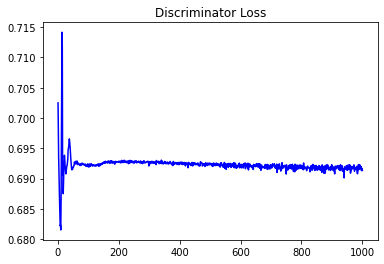

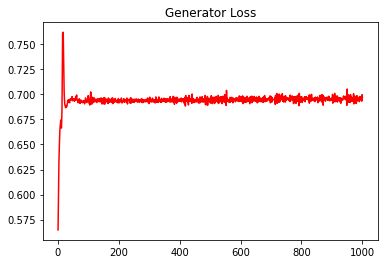

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.8999325493618338


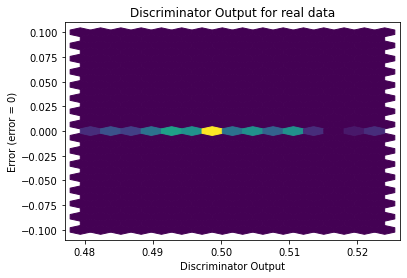

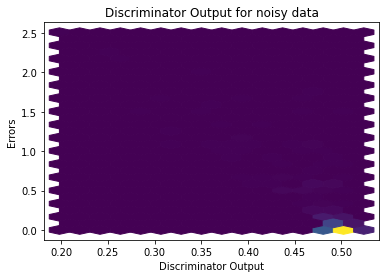

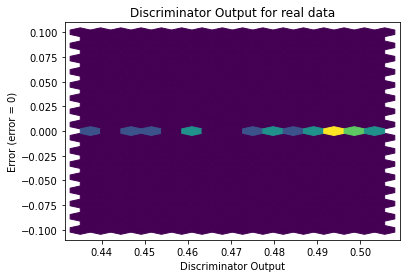

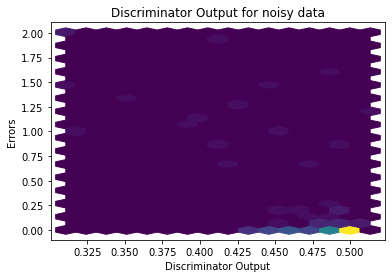

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


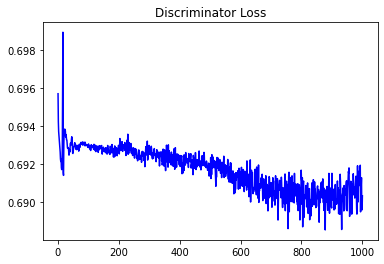

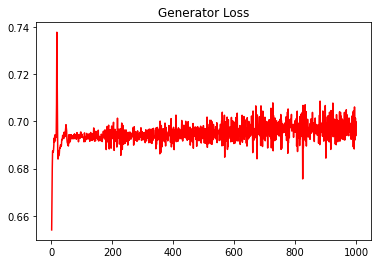

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.8211057269273228


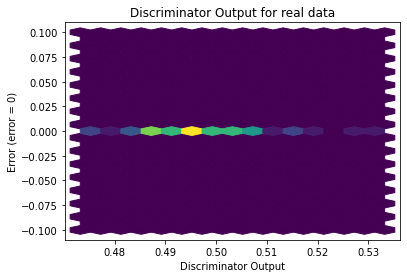

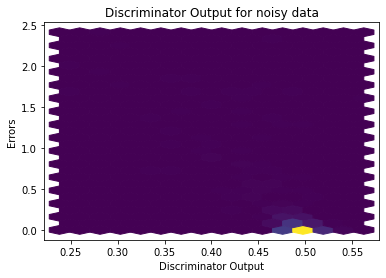

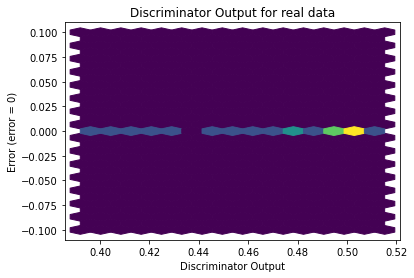

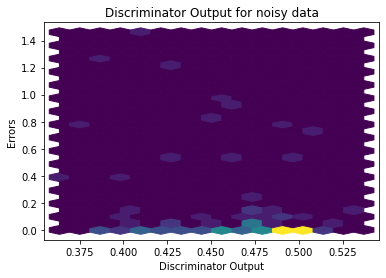

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1470]], requires_grad=True)
